Drug Recommendation System

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and Display the Dataset
df = pd.read_csv("/medicine_dataset.csv")

In [3]:
# Dataset Description
df.head()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938 mg,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337 mg,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333 mg,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362 mg,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802 mg,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Category        50000 non-null  object
 2   Dosage Form     50000 non-null  object
 3   Strength        50000 non-null  object
 4   Manufacturer    50000 non-null  object
 5   Indication      50000 non-null  object
 6   Classification  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [5]:
df.shape

(50000, 7)

In [6]:
# Statistical summary
df.describe()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
count,50000,50000,50000,50000,50000,50000,50000
unique,64,8,8,999,20,8,2
top,Metostatin,Antidepressant,Inhaler,347 mg,Boehringer Ingelheim GmbH,Infection,Over-the-Counter
freq,860,6354,6364,77,2587,6393,25015


Exploratory Data Analysis

TypeError: _process_plot_var_args.__call__() missing 1 required positional argument: 'axes'

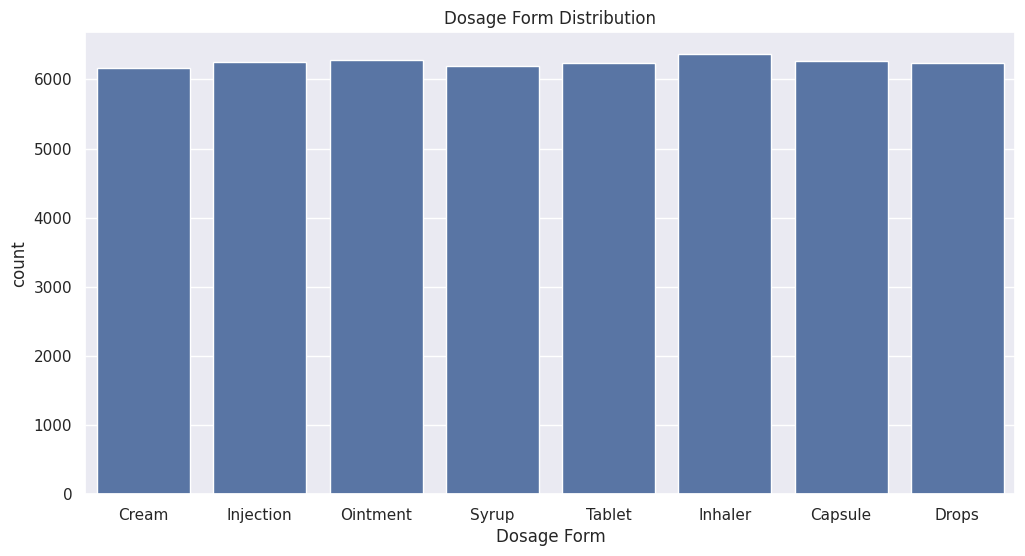

In [48]:
# 1. Distribution of Dosage Forms (Colored)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Dosage Form', data=df)
plt.title('Dosage Form Distribution')
patches = ax.patches
for patch in patches:
    patch.set_facecolor(next(ax._get_patches_for_fill().prop_cycler)['color'])
plt.show()

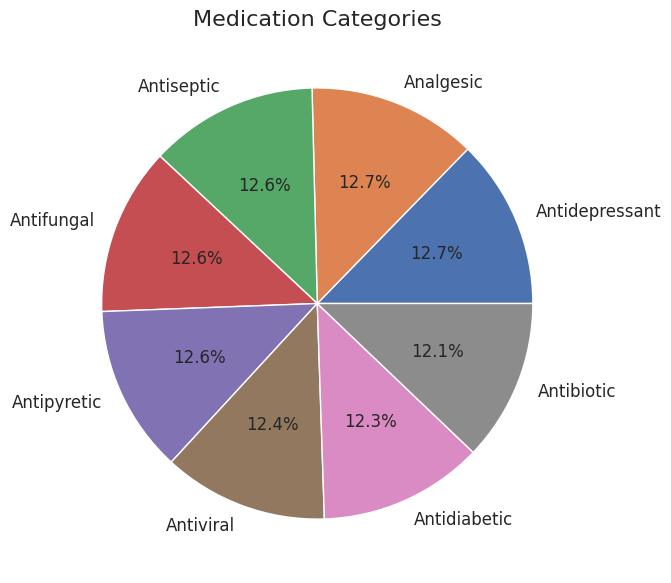

In [59]:
# 2. Medication Categories (Pie Chart)
plt.figure(figsize=(7,7))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Medication Categories', fontsize=16)
plt.ylabel('')  # Remove default y label
plt.show()

TypeError: _process_plot_var_args.__call__() missing 1 required positional argument: 'axes'

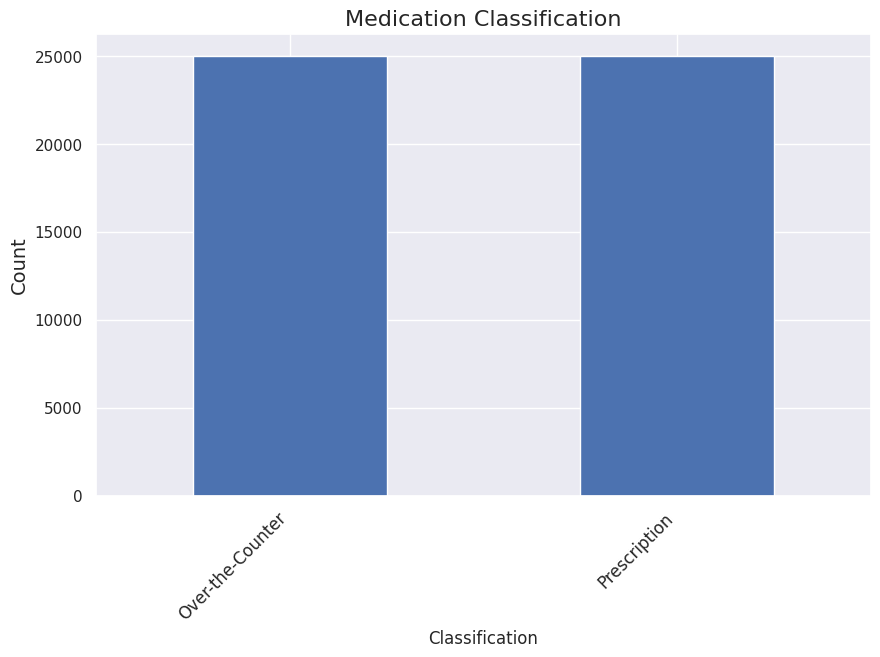

In [50]:
# 3. Classification Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
ax = df['Classification'].value_counts().plot(kind='bar')
plt.title('Medication Classification', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.ylabel('Count', fontsize=14)
for patch in ax.patches:
    patch.set_facecolor(next(ax._get_patches_for_fill().prop_cycler)['color'])
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

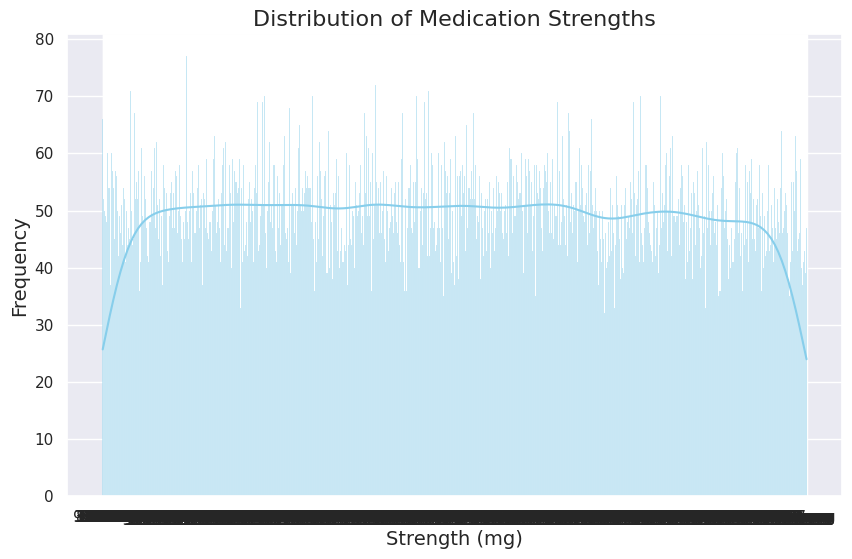

In [51]:
# 4. Strength Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Strength'], kde=True, color='skyblue')
plt.title('Distribution of Medication Strengths', fontsize=16)
plt.xlabel('Strength (mg)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


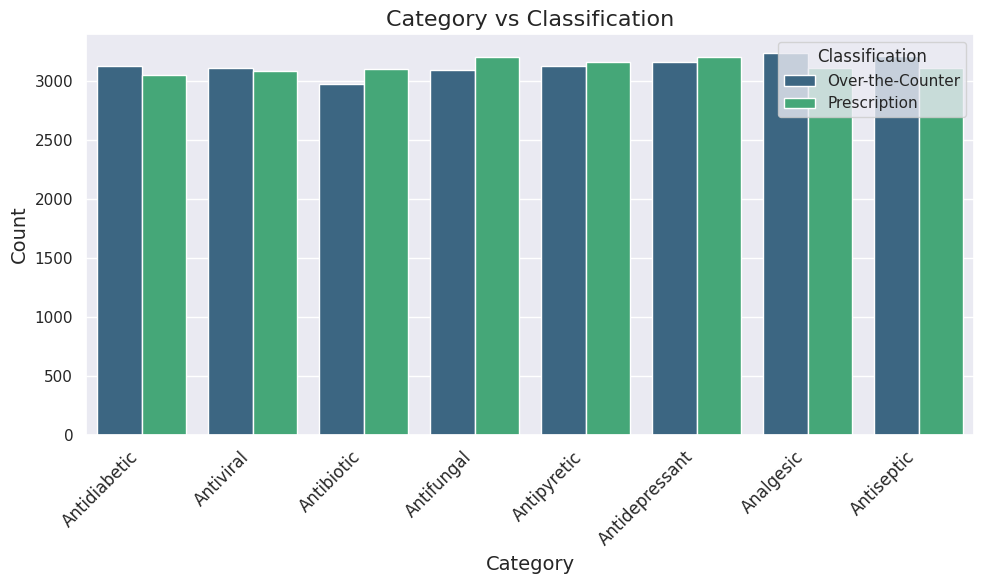

In [58]:
# 5. Category vs Classification (Grouped Countplot)
plt.figure(figsize=(10,6)) #Increased figure size for better readability
sns.countplot(x='Category', hue='Classification', data=df, palette='viridis')
plt.title('Category vs Classification', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate x-axis labels
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

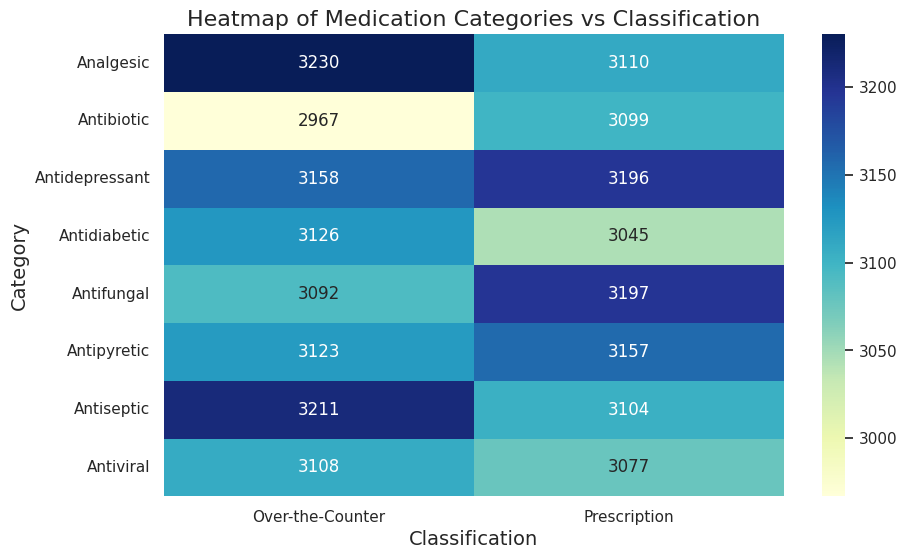

In [57]:
# 6. Heatmap of Medication Characteristics
plt.figure(figsize=(10,6)) #Adjusted figure size for better display
heatmap_data = pd.crosstab(df['Category'], df['Classification'])
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d') # fmt='d' for integers in heatmap
plt.title('Heatmap of Medication Categories vs Classification', fontsize=16)
plt.xlabel('Classification', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

<ipython-input-56-360d2409f266>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Strength', data=df, palette='Set3')


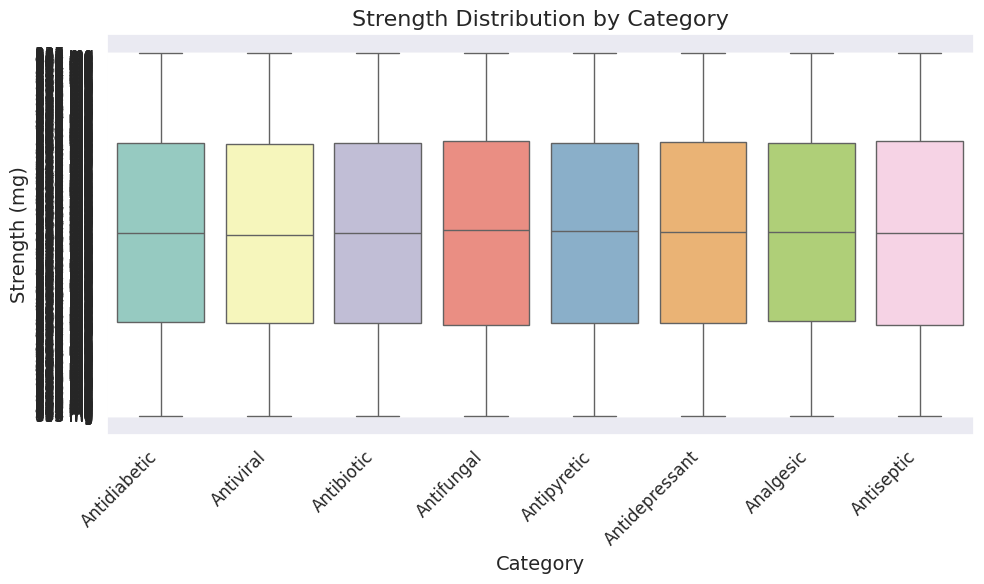

In [56]:
# 8. Boxplot of Strength by Category
plt.figure(figsize=(10, 6)) #Adjusted for better display
sns.boxplot(x='Category', y='Strength', data=df, palette='Set3')
plt.title('Strength Distribution by Category', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Strength (mg)', fontsize=14)
plt.tight_layout()
plt.show()

 Machine learning model building

In [64]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

Data Preprocessing

In [69]:
# Encode categorical variables
le_category = LabelEncoder()
le_dosage = LabelEncoder()
le_classification = LabelEncoder()
# %%
df['Category_Encoded'] = le_category.fit_transform(df['Category'])
df['Dosage_Encoded'] = le_dosage.fit_transform(df['Dosage Form'])
df['Classification_Encoded'] = le_classification.fit_transform(df['Classification'])
# %%
# Clean 'Strength' column by removing ' mg' and convert to numeric
df['Strength'] = df['Strength'].str.replace(' mg', '', regex=False).astype(float)

# Prepare features for KNN
features = df[['Category_Encoded', 'Dosage_Encoded', 'Strength', 'Classification_Encoded']]
# %%
# Scale numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [70]:
# Create KNN model
def medicine_recommender(medicine_name, n_recommendations=5):
    # Find the index of the input medicine
    medicine_index = df[df['Name'] == medicine_name].index[0]

    # Create Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=n_recommendations+1, metric='euclidean')
    nn_model.fit(features_scaled)

    # Find nearest neighbors
    distances, indices = nn_model.kneighbors(features_scaled[medicine_index].reshape(1, -1))

    # Exclude the medicine itself
    recommended_indices = indices[0][1:]

    # Return recommended medicines
    recommendations = df.iloc[recommended_indices][['Name', 'Category', 'Dosage Form', 'Strength', 'Indication']]
    return recommendations

In [76]:
# Example usage
example_medicine = df['Name'].iloc[0]
recommendations = medicine_recommender(example_medicine)
print(f"Recommendations for {example_medicine}:")
print(recommendations)

Recommendations for Acetocillin:
              Name      Category Dosage Form  Strength Indication
17647     Cefmycin  Antidiabetic       Cream     938.0  Infection
39010     Acetomet  Antidiabetic       Cream     938.0  Infection
23465  Amoxinazole  Antidiabetic       Cream     937.0      Wound
41692       Cefmet  Antidiabetic       Cream     939.0       Pain
7889      Clarivir  Antidiabetic       Cream     940.0      Virus
